In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
datagen= ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True

)
datagen.fit(X_train)

In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
train_generator = datagen.flow(X_train_final, y_train_final, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

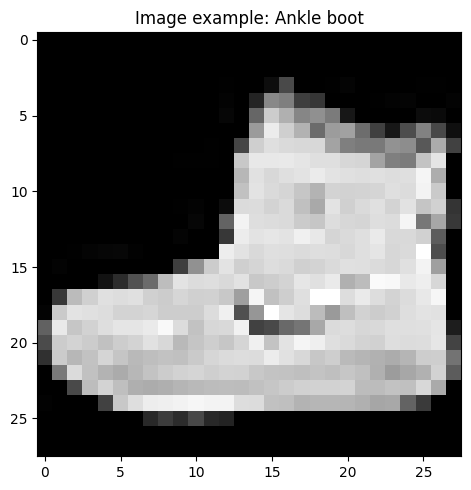

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Image example: {class_names[y_train[0]]}')
plt.colorbar
plt.tight_layout()
plt.savefig('sample_image.png')
plt.show()

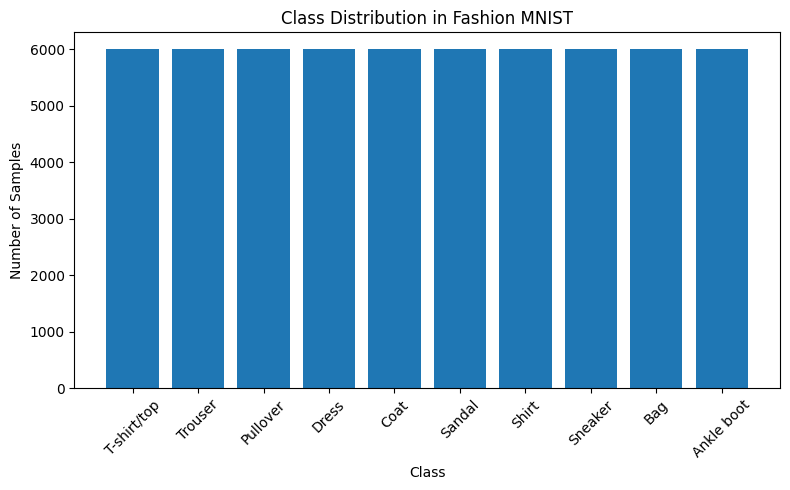

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8,5))
plt.bar(unique, counts)
plt.xticks(unique, class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Fashion MNIST')
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(X_train_final) // 32,
    validation_steps=len(X_val) // 32,
    epochs=30,
    callbacks=[callback]
)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6841 - loss: 0.8708 - val_accuracy: 0.8223 - val_loss: 0.4649
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8241 - loss: 0.4742 - val_accuracy: 0.8577 - val_loss: 0.3963
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8498 - loss: 0.4087 - val_accuracy: 0.8659 - val_loss: 0.3584
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8632 - loss: 0.3693 - val_accuracy: 0.8741 - val_loss: 0.3349
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8717 - loss: 0.3477 - val_accuracy: 0.8767 - val_loss: 0.3285
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.8783 - loss: 0.3277 - val_accuracy: 0.8830 - val_loss: 0.3184
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8818 - loss: 0.3185 - val_accuracy: 0.8865 - val_loss: 0.2983
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8848 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nModel accuracy on test data: {test_accuracy*100:.2f}%")


Model accuracy on test data: 90.95%


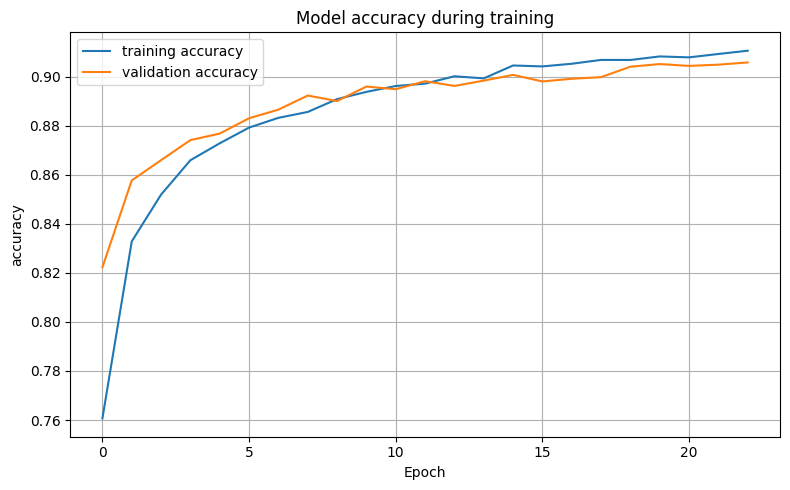

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_plot.png')
plt.show()

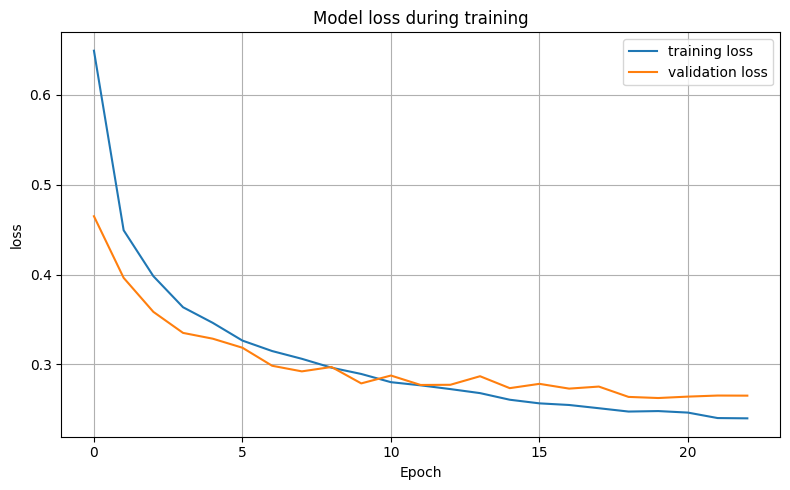

In [ ]:
# Loss display
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss during training')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_plot.png')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


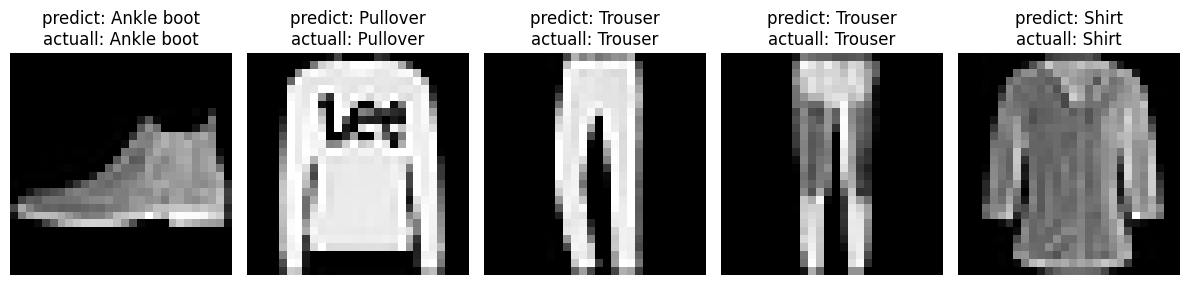

In [ ]:
predictions = model.predict(X_test)
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"predict: {class_names[predicted_label]}\nactuall: {class_names[true_label]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('predictions.png')
plt.show()

<Figure size 1000x800 with 0 Axes>

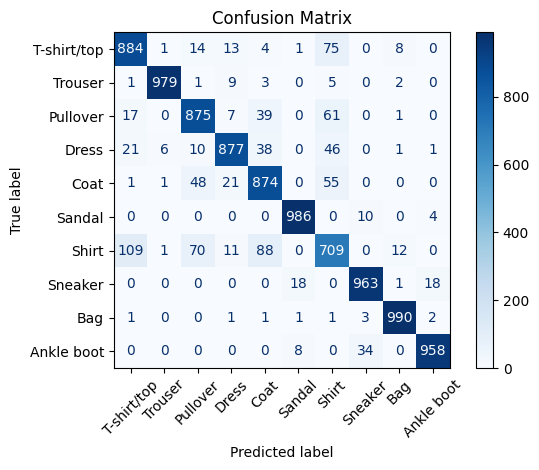


📄 Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.93      0.88      0.90      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.74      0.71      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
y_pred=np.argmax(predictions, axis=1)
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(10,8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))